In [1]:
#
# Chapter 7, example 2
#

import tensorflow as tf
import numpy as np
from tensorflow.keras import Model, layers, models
import matplotlib.pyplot as plt

# Check the version of Tensorflow (2.2.0)
print(tf.__version__)

2.2.0


In [2]:
# Load and prepare the MNIST dataset. Convert the samples from integers to floating-point numbers:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


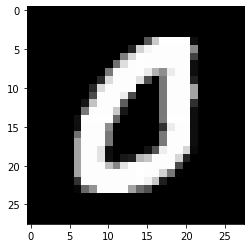

In [3]:
# Select a random sample
seed = 1
np.random.seed(seed)
ind = np.random.randint(low=0, high=55000)
x = x_train[ind, :].astype(np.float32)
plt.imshow(x, cmap='gray')


In [4]:
# Model definition
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.seq = models.Sequential()
        self.seq.add(layers.Conv2D(3, 3, padding='VALID', input_shape=[28,28,1], use_bias=False))

    def call(self, x):
        x1 = self.seq(x)
        x2 = tf.nn.sigmoid(x1)
        x3 = tf.nn.max_pool(x2, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
        return x1, x3


In [5]:
# Set filters
w = np.array([[[-1, 0, 1],[-2, 0, 2], [-1, 0, 1]],
     [[1, 2, 1],[0, 0, 0], [-1, -2, -1]],
     [[3, 4, 3], [4, 5, 4], [3, 4, 3]]]).astype(np.float32).reshape(3,3,1,3)

In [6]:
model = MyModel()
model.seq.summary() 
model.seq.set_weights([w])
# filters
print(model.seq.weights[0])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 3)         27        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 3) dtype=float32, numpy=
array([[[[-1.,  0.,  1.]],

        [[-2.,  0.,  2.]],

        [[-1.,  0.,  1.]]],


       [[[ 1.,  2.,  1.]],

        [[ 0.,  0.,  0.]],

        [[-1., -2., -1.]]],


       [[[ 3.,  4.,  3.]],

        [[ 4.,  5.,  4.]],

        [[ 3.,  4.,  3.]]]], dtype=float32)>


In [7]:
# evaluate
u, o = model(x.reshape([1, 28, 28, 1]))
print(x.shape)
print(u.shape[1:])
print(o.shape[1:])

(28, 28)
(26, 26, 3)
(13, 13, 3)


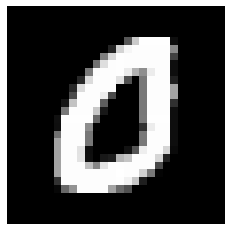

In [8]:
# plot input image
plt.figure()
plt.gray()
plt.axis('off')
plt.imshow(x.reshape(28,28))

(<AxesSubplot:>,
 (0.0, 1.0, 0.0, 1.0),
 <matplotlib.image.AxesImage at 0x7f4cad43f310>)

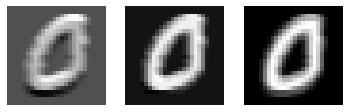

In [9]:
# plot u of convolution layer
plt.figure()
plt.gray()
plt.subplot(1,3,1), plt.axis('off'), plt.imshow(u[0,:,:,0])
plt.subplot(1,3,2), plt.axis('off'), plt.imshow(u[0,:,:,1])
plt.subplot(1,3,3), plt.axis('off'), plt.imshow(u[0,:,:,2])

(<AxesSubplot:>,
 (0.0, 1.0, 0.0, 1.0),
 <matplotlib.image.AxesImage at 0x7f4cad347310>)

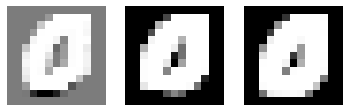

In [10]:
# plot output o of pooling layer
plt.figure()
plt.gray()
plt.subplot(1,3,1), plt.axis('off'), plt.imshow(o[0,:,:,0])
plt.subplot(1,3,2), plt.axis('off'), plt.imshow(o[0,:,:,1])
plt.subplot(1,3,3), plt.axis('off'), plt.imshow(o[0,:,:,2])